## Загрузка полученных данных

In [7]:
from sklearn.model_selection import  learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.model_selection import  learning_curve
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss

import torch
from torch_geometric.data import Data

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss, roc_auc_score, roc_curve

## Загрузка исходных данных

In [69]:
final_data = pd.read_csv('./Data/GNN_final_data.csv')

In [70]:
final_data = final_data.drop(['date_key'], axis=1)

In [71]:
final_data.head(2)

,amount,client_inn,partner_inn,years,Длина_Отн_в_днях,Клиент_Сегмент_КБ,Клиент_Сегмент_МБ,Клиент_Сегмент_МКП,Клиент_Сегмент_СБ,Клиент_НаличиеЗПпроекта_Д,Клиент_НаличиеЗПпроекта_Н,Fraud_presence,Reject_presence
0,41000.0,1279230,1,54.0,6251.0,1,0,0,0,0,1,0.0,0.0
1,618280.0,1279230,1003953,54.0,6251.0,1,0,0,0,0,1,0.0,0.0


In [72]:
final_data.shape

(7015937, 13)

In [73]:
final_data['client_inn'].unique().shape

(63864,)

In [74]:
final_data.shape

(7015937, 13)

In [75]:
data_X = final_data.drop(['Fraud_presence'], axis=1)

In [76]:
data_X.shape

(7015937, 12)

In [77]:
data_Y  = final_data['Fraud_presence']

In [78]:
# Load the file
pt_file_1 = torch.load("./graph1_hope_1.pt")

pt_file_1 = pd.DataFrame(pt_file_1.numpy())

# Print the head of the file
print(pt_file_1.head(2))

             0            1             2          3         4         5   \
0  2.192833e+06  1427.545044  69158.156250  20.182766  0.853016  0.715973   
1  7.270557e+04    34.170017   2438.131104   0.625779  0.000000  0.005733   

         6          7         8         9             10            11  
0  2.821092  20.581282  3.991510  0.011809  1.118243e+06  1.851281e+07  
1  0.004828   0.252126  0.384215  0.197520  3.159539e+04  6.766557e+05  


In [79]:
pt_file_2 = torch.load("./graph1_hope_2.pt")

pt_file_2 = pd.DataFrame(pt_file_2.numpy())

# Print the head of the file
print(pt_file_2.head(2))

             0            1              2          3         4         5   \
0  4.341373e+06  1965.599854  128323.398438  24.328848  6.005088  5.177354   
1  9.008470e+04    36.415588    2345.018799   0.539458  0.054276  0.044689   

         6          7          8         9             10           11  
0  3.610386  19.661173  19.460478  8.504985  1.556792e+06  29073114.00  
1  0.061234   0.346111   0.353546  0.154498  3.066910e+04    583044.75  


In [80]:
pt_file_2.shape

(7015937, 12)

In [81]:
pt_file_3 = torch.load("./graph1_hope_3.pt")

pt_file_3 = pd.DataFrame(pt_file_3.numpy())

# Print the head of the file
print(pt_file_3.head(2))

             0            1             2          3         4         5   \
0  2.901591e+06  1462.082520  84100.078125  19.112059  2.836726  2.429763   
1  1.100155e+05    49.994579   3298.087646   0.667906  0.125481  0.107464   

         6          7         8         9             10            11  
0  2.848527  17.732861  9.494099  3.108360  1.145987e+06  2.033233e+07  
1  0.085026   0.483781  0.502096  0.226028  4.055820e+04  7.656247e+05  


In [82]:
all_feauters = pd.concat([data_X, pt_file_1, pt_file_2, pt_file_3], axis=1)
all_feauters.head(5)

,amount,client_inn,partner_inn,years,Длина_Отн_в_днях,Клиент_Сегмент_КБ,Клиент_Сегмент_МБ,Клиент_Сегмент_МКП,Клиент_Сегмент_СБ,Клиент_НаличиеЗПпроекта_Д,...,2,3,4,5,6,7,8,9,10,11
0,41000.0,1279230,1,54.0,6251.0,1,0,0,0,0,...,84100.078125,19.112059,2.836726,2.429763,2.848527,17.732861,9.494099,3.108360,1.145987e+06,2.033233e+07
1,618280.0,1279230,1003953,54.0,6251.0,1,0,0,0,0,...,3298.087646,0.667906,0.125481,0.107464,0.085026,0.483781,0.502096,0.226028,4.055820e+04,7.656247e+05
2,2698540.0,1279230,682959,54.0,6251.0,1,0,0,0,0,...,4307.255371,0.927595,0.179642,0.146864,0.134246,0.658202,0.730141,0.363939,5.606564e+04,1.039478e+06
3,3000.0,1279230,1852820,54.0,6251.0,1,0,0,0,0,...,31379.005859,5.894304,1.480769,1.245868,0.862637,4.719183,4.764338,2.073277,3.759357e+05,7.040396e+06
4,1000.0,1279230,119556,54.0,6251.0,1,0,0,0,0,...,3370.708740,0.613112,0.116228,0.105565,0.102977,0.465389,0.472495,0.145853,3.300685e+04,6.595803e+05


In [83]:
all_feauters.shape

(7015937, 48)

## Разделение данных на train и test

In [84]:
all_feauters = all_feauters.drop(['partner_inn', 'client_inn'], axis=1)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(all_feauters, data_Y, test_size=0.33, random_state=42)

## Random Forest Classifier

In [86]:
rf=RandomForestClassifier(random_state = 1, max_depth=10, n_estimators=60, n_jobs=-1)

In [87]:
rf.fit(X_train, y_train)

/data/home/krazheva/.conda/envs/py310/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier(max_depth=10, n_estimators=60, n_jobs=-1, random_state=1)

In [88]:
predictions_rf = rf.predict(X_test)
predictions_rf

/data/home/krazheva/.conda/envs/py310/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([0., 0., 0., ..., 0., 0., 0.])

In [89]:
print("Precision:", precision_score(y_test, predictions_rf))
print("Recall: ", recall_score(y_test, predictions_rf))
print("Accuracy: ", accuracy_score(y_test, predictions_rf))
print("F1-score: ", f1_score(y_test, predictions_rf))
print("Log_loss: ", log_loss(y_test, predictions_rf))

Precision: 0.8542433499739215
Recall:  0.5681606438440343
Accuracy:  0.9769567996682877
F1-score:  0.6824326335275805
Log_loss:  0.7958873216430749


In [90]:
roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

/data/home/krazheva/.conda/envs/py310/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.9679281317094865

In [91]:
predict = rf.predict_proba(X_test)
pos_param = predict[:, 1]

/data/home/krazheva/.conda/envs/py310/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [92]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss, roc_auc_score, roc_curve

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

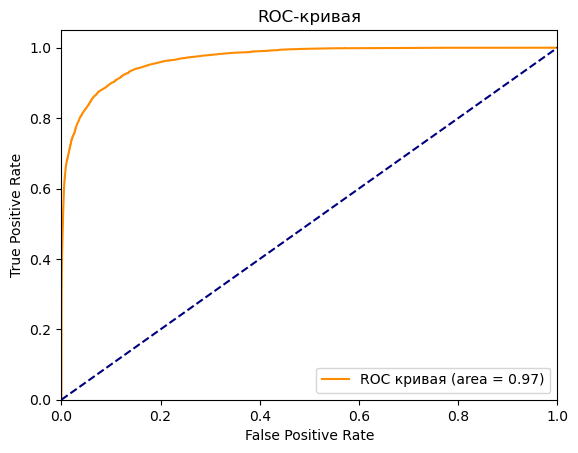

In [93]:
fpr, tpr, treshold = roc_curve(y_test, pos_param)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

## XGBoosting

In [94]:
xgb = XGBClassifier(learning_rate= 0.1, n_estimators=300, n_jobs=-1)

In [95]:
list(X_train)

['amount',
 'years',
 'Длина_Отн_в_днях',
 'Клиент_Сегмент_КБ',
 'Клиент_Сегмент_МБ',
 'Клиент_Сегмент_МКП',
 'Клиент_Сегмент_СБ',
 'Клиент_НаличиеЗПпроекта_Д',
 'Клиент_НаличиеЗПпроекта_Н',
 'Reject_presence',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11]

In [96]:
y_train = pd.DataFrame(y_train)
y_train

,Fraud_presence
3617583,0.0
1765637,0.0
2717615,0.0
5439987,0.0
4718913,1.0
...,...
1692743,0.0
6550634,0.0
6423388,0.0
6962611,0.0


In [97]:
y_train.rename(columns={"Fraud_presence": "Fraud"})
y_train.reset_index(drop=True)

,Fraud_presence
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
4700672,0.0
4700673,0.0
4700674,0.0
4700675,0.0


In [57]:
xgb.fit(X_train, y_train)

ValueError: feature_names must be unique